In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [6]:
df = pd.read_csv("./Fish.csv")

In [7]:
df.shape

(159, 7)

This dataset contain 159 rows and 7 columns.

In [8]:
df.sample(6)

,Species,Weight,Length1,Length2,Length3,Height,Width
49,Roach,161.0,22.0,23.4,26.7,6.9153,3.6312
101,Perch,218.0,25.0,26.5,28.0,7.1680,4.1440
26,Bream,720.0,32.0,35.0,40.6,16.3618,6.0900
28,Bream,850.0,32.8,36.0,41.6,16.8896,6.1984
140,Pike,950.0,48.3,51.7,55.1,8.9262,6.1712
145,Smelt,6.7,9.3,9.8,10.8,1.7388,1.0476


In [9]:
df.duplicated().sum()

0

There are no duplicate values in this dataset.

In [10]:
df.isnull().sum()

Species    0
Weight     0
Length1    0
Length2    0
Length3    0
Height     0
Width      0
dtype: int64

There are no mussing values in this dataset.

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


In [12]:
df.describe()

,Weight,Length1,Length2,Length3,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,26.247170,28.415723,31.227044,8.970994,4.417486
std,357.978317,9.996441,10.716328,11.610246,4.286208,1.685804
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,19.050000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,25.200000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,32.700000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


In [13]:
df['Species'].value_counts()

Perch        56
Bream        35
Roach        20
Pike         17
Smelt        14
Parkki       11
Whitefish     6
Name: Species, dtype: int64

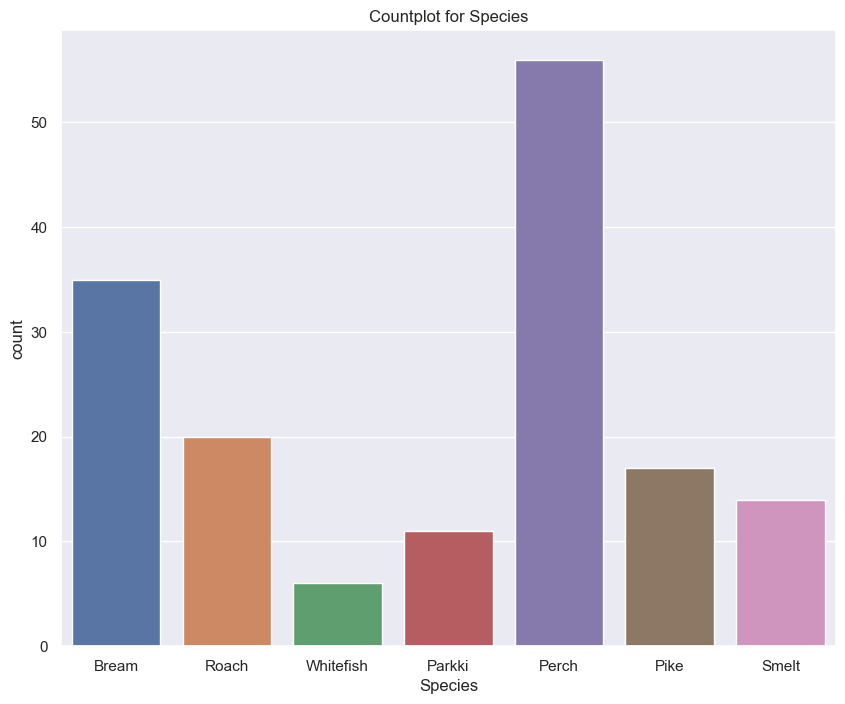

In [14]:
sns.set()
plt.figure(figsize = (10, 8))
sns.countplot(x = 'Species', data = df)
plt.title('Countplot for Species')
plt.show()

This column has categorical values,We have to convert them into numerical values.

In [15]:
df.replace({'Species' : {'Bream' : 1, 'Roach' : 2, 'Whitefish' : 3, 'Parkki' : 4, 'Perch' : 5, 'Pike' : 6, 'Smelt' : 7}}, inplace = True)

In [16]:
df['Species'].value_counts()

5    56
1    35
2    20
6    17
7    14
4    11
3     6
Name: Species, dtype: int64

In [18]:
print(df.std())

Species      2.026298
Weight     357.978317
Length1      9.996441
Length2     10.716328
Length3     11.610246
Height       4.286208
Width        1.685804
dtype: float64


There are some outlier data in this dataset.

In [19]:
x = df.drop(columns = 'Species', axis = 1)
x.sample(6)

,Weight,Length1,Length2,Length3,Height,Width
29,1000.0,33.5,37.0,42.6,18.9570,6.6030
106,250.0,25.9,28.0,29.4,7.8204,4.2042
110,556.0,32.0,34.5,36.5,10.2565,6.3875
1,290.0,24.0,26.3,31.2,12.4800,4.3056
84,125.0,19.0,21.0,22.5,5.6925,3.6675
95,170.0,21.5,23.5,25.0,6.2750,3.7250


In [20]:
y = df['Species']
y.sample(6)

42     2
143    6
137    6
105    5
116    5
80     5
Name: Species, dtype: int64

In [21]:
print(x.shape)
print(y.shape)

(159, 6)
(159,)


Now split the data into training data and testing data.

In [25]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.2, random_state = 4)

In [26]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(31, 6)
(31,)
(128, 6)
(128,)


In [27]:
scaler = StandardScaler()

In [28]:
scaler.fit(x_train)

StandardScaler()

In [29]:
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [30]:
x_train = pd.DataFrame(x_train, columns = ['Weight', 'Length1', 'Length2',	'Length3',	'Height',	'Width'])
x_test = pd.DataFrame(x_test, columns = ['Weight', 'Length1', 'Length2',	'Length3',	'Height',	'Width'])

In [31]:
x_train.sample(6)

,Weight,Length1,Length2,Length3,Height,Width
24,0.315446,0.036319,0.055025,0.066407,0.436247,1.214849
22,0.239582,0.254938,0.238883,0.066407,0.248213,0.858677
10,-0.472368,-0.444643,-0.404618,-0.385720,-0.248104,-0.299863
2,-0.201010,-0.204162,-0.149260,0.018309,0.959268,-0.164334
11,0.738531,0.353317,0.361454,0.566634,1.818749,0.434676
3,3.262454,3.042334,3.017169,2.952328,0.134971,0.941173


In [32]:
x_test.sample(6)

,Weight,Length1,Length2,Length3,Height,Width
109,0.362131,0.418903,0.412525,0.306901,0.307862,1.100599
45,-0.910043,-0.958399,-0.966403,-0.924426,-0.782923,-0.924604
15,-0.910043,-1.166087,-1.170689,-1.155299,-0.183108,-1.170912
46,-1.143469,-1.570532,-1.579261,-1.665145,-1.386161,-1.489175
31,-0.968400,-1.308189,-1.272832,-1.357314,-1.017887,-0.906730
55,0.125787,0.025388,0.055025,0.278041,1.362937,0.260387


Now we can train the model

In [33]:
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

Model evaluating.

In [34]:
traning_data_prediction = lr.predict(x_train) 
r2_train = metrics.r2_score(y_train, traning_data_prediction)
print("R square value : ", r2_train)
test_data_prediction = lr.predict(x_test)
r2_test = metrics.r2_score(y_test, test_data_prediction)
print("R square value for test data : ", r2_test)

R square value :  0.8123527726283445
R square value for test data :  0.8245548216301238


Building the predictive system.

In [35]:
input_data = (20, 1, 25, 74, 0, 1)
input_array = np.asarray(input_data).reshape(1, -1)
data_prediction = lr.predict(input_array) 
data_prediction

C:\Users\pinil\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([-659.91711429])